In [4]:
# Q1
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        scale_tau = np.sum((x - theta[c, g - 1]) ** 2) / 2
        tau[c, g] = stats.gamma.rvs(a = n / 2, scale = 1 / scale_tau)
        mean_theta = n * np.mean(x) / (tau[c, g] + n)
        var_theta = 1 / (tau[c, g] + n)
        theta[c, g] = stats.norm.rvs(loc = mean_theta, scale = np.sqrt(var_theta))

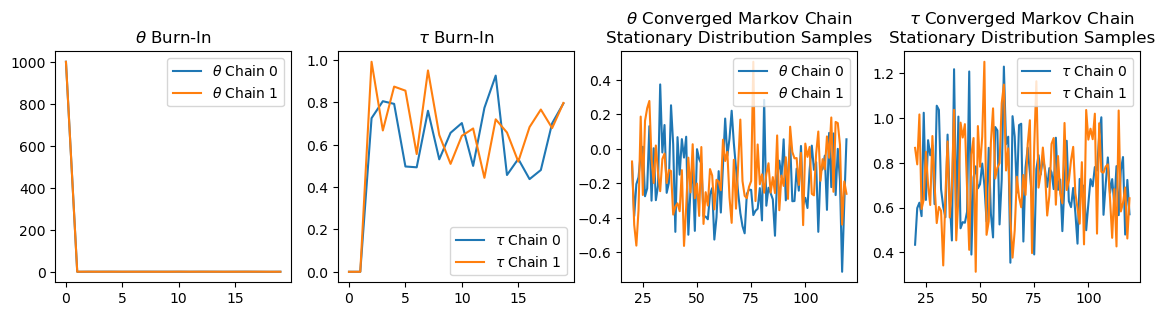

In [5]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

In [6]:
# Q2
n = 30  
m = 0   
s = 1   
x = stats.norm(loc=m, scale=s).rvs(size=n)

# Prior hyperparameters
theta0 = 0    
tau0_sq = 1   
alpha = 2     
lambda_ = 1 

# Gibbs sampler parameters
C, G = 2, 10000  
theta, tau = np.zeros((C, G)), np.zeros((C, G))
theta[:, 0] = 1000 
tau[:, 0] = 1    

# Gibbs sampling
for c in range(C):
    for g in range(1, G):
        shape_tau = (n + alpha) / 2
        rate_tau = (np.sum((x - theta[c, g-1])**2) + lambda_) / 2
        tau[c, g] = stats.gamma.rvs(a=shape_tau, scale=1/rate_tau)
        mean_theta = (tau[c, g] * np.sum(x) + theta0 / tau0_sq) / (tau[c, g] * n + 1 / tau0_sq)
        var_theta = 1 / (tau[c, g] * n + 1 / tau0_sq)
        theta[c, g] = stats.norm.rvs(loc=mean_theta, scale=np.sqrt(var_theta))

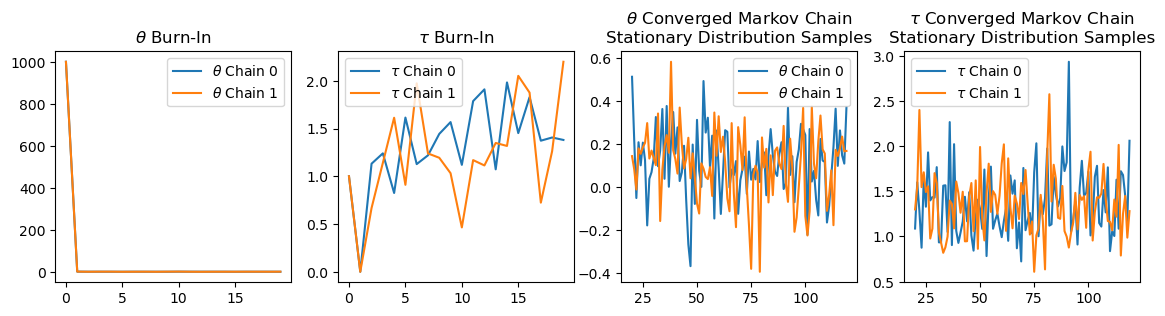

In [7]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

In [ ]:
#Q3

# we can know that the posterior is proportional to the joint distribution as long as we can identify the distribution.